# Imports and Configuration

In [1]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


# General Data Description

In [2]:
data = pd.read_csv('./house_prices.csv')

data.describe(include='all')

Suburb       Address         Rooms   Type         Price Method  \
count       13580         13580  13580.000000  13580  1.358000e+04  13580   
unique        314         13378           NaN      3           NaN      5   
top     Reservoir  5 Charles St           NaN      h           NaN      S   
freq          359             3           NaN   9449           NaN   9022   
mean          NaN           NaN      2.937997    NaN  1.075684e+06    NaN   
std           NaN           NaN      0.955748    NaN  6.393107e+05    NaN   
min           NaN           NaN      1.000000    NaN  8.500000e+04    NaN   
25%           NaN           NaN      2.000000    NaN  6.500000e+05    NaN   
50%           NaN           NaN      3.000000    NaN  9.030000e+05    NaN   
75%           NaN           NaN      3.000000    NaN  1.330000e+06    NaN   
max           NaN           NaN     10.000000    NaN  9.000000e+06    NaN   

       SellerG        Date      Distance      Postcode  ...      Bathroom  \
count    13580       13580  13580.000000  13580.000000  ...  13580.000000   
unique     268          58           NaN           NaN  ...           NaN   
top     Nelson  27/05/2017           NaN           NaN  ...           NaN   
freq      1565         473           NaN           NaN  ...           NaN   
mean       NaN         NaN     10.137776   3105.301915  ...      1.534242   
std        NaN         NaN      5.868725     90.676964  ...      0.691712   
min        NaN         NaN      0.000000   3000.000000  ...      0.000000   
25%        NaN         NaN      6.100000   3044.000000  ...      1.000000   
50%        NaN         NaN      9.200000   3084.000000  ...      1.000000   
75%        NaN         NaN     13.000000   3148.000000  ...      2.000000   
max        NaN         NaN     48.100000   3977.000000  ...      8.000000   

                 Car       Landsize  BuildingArea    YearBuilt  CouncilArea  \
count   13518.000000   13580.000000   7130.000000  8205.000000        12211   
unique           NaN            NaN           NaN          NaN           33   
top              NaN            NaN           NaN          NaN     Moreland   
freq             NaN            NaN           NaN          NaN         1163   
mean        1.610075     558.416127    151.967650  1964.684217          NaN   
std         0.962634    3990.669241    541.014538    37.273762          NaN   
min         0.000000       0.000000      0.000000  1196.000000          NaN   
25%         1.000000     177.000000     93.000000  1940.000000          NaN   
50%         2.000000     440.000000    126.000000  1970.000000          NaN   
75%         2.000000     651.000000    174.000000  1999.000000          NaN   
max        10.000000  433014.000000  44515.000000  2018.000000          NaN   

           Lattitude    Longtitude             Regionname Propertycount  
count   13580.000000  13580.000000                  13580  13580.000000  
unique           NaN           NaN                      8           NaN  
top              NaN           NaN  Southern Metropolitan           NaN  
freq             NaN           NaN                   4695           NaN  
mean      -37.809203    144.995216                    NaN   7454.417378  
std         0.079260      0.103916                    NaN   4378.581772  
min       -38.182550    144.431810                    NaN    249.000000  
25%       -37.856822    144.929600                    NaN   4380.000000  
50%       -37.802355    145.000100                    NaN   6555.000000  
75%       -37.756400    145.058305                    NaN  10331.000000  
max       -37.408530    145.526350                    NaN  21650.000000  

[11 rows x 21 columns]

# Density of Home Prices

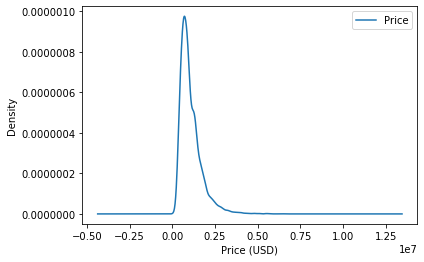

In [3]:
sale_price = data.loc[:, ['Price']]

ax = sale_price.plot.kde()
ax.set_xlabel('Price (USD)');

# Data Exploration

Text(0.5, 0, 'Rooms')

Text(0, 0.5, 'Price')

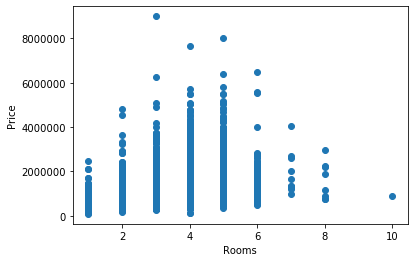

Text(0.5, 0, 'SellerG')

Text(0, 0.5, 'Price')

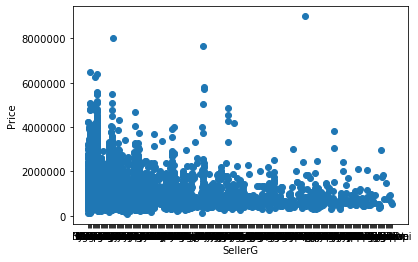

Text(0.5, 0, 'Postcode')

Text(0, 0.5, 'Price')

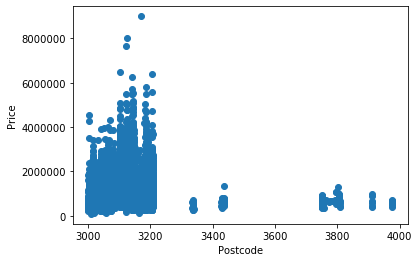

Text(0.5, 0, 'YearBuilt')

Text(0, 0.5, 'Price')

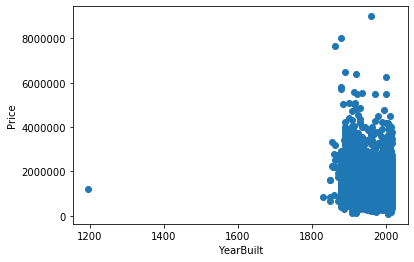

In [4]:
cols = ['Rooms', 'SellerG', 'Postcode', 'YearBuilt']
for col in cols:
    x = data.loc[:, [col]]
    y = data.loc[:,['Price']]
    df = pd.concat([x,y], axis=1, sort=False)
    plt.scatter(df[col], df['Price']);
    plt.xlabel(col);
    plt.ylabel('Price');
    plt.show();

# Multivariable Linear Regression Prediction

In [5]:
x = data[['Rooms', 'Postcode']].to_numpy().reshape(-1,2)
y = data[['Price']]

clf = linear_model.LinearRegression()
model = clf.fit(x, y);

new_rooms = 5
new_postcode = 3044

import locale
locale.setlocale(locale.LC_ALL, '')

prediction = model.predict([[new_rooms, new_postcode]])[0][0]
print(''.join(['The Predicted price is: ',locale.currency(prediction, grouping=True)]))



'English_United States.1252'

The Predicted price is: $1,719,681.23
